# Analyzing Constituent Values

Here, we will analyze the constituent values of the dataset to get a better sense on the state of water quality in the San Francsico Bay. Here is a list of all the constituents recorded in the dataframe that we will analyze: 
* Discrete Cholorophyll-a
* Calculated Cholorophyll
* Discrete Oxygen
* Calculated Oxygen
* Discrete SPM
* Calculated SPM
* Extinction Coefficient
* Salinity
* Temperature
* Nitrite
* Ammonium
* Phosphate

Discrete values are the recorded values conducted by USGS in their trials of examining water at particular stations; in contrast, calculated values are estimated concentrations of the constituent at different levels of depth and numerous stations. We will focus on the calculated values of the constituent. For this quick summary report, I won't be analyzing each station (there are 34 stations in total!), and I found it best to group some stations in 4 regions when I wanted to investigate summary statistics for particular places around the bay. These regions will be Suisun Bay, the San Pablo Bay, the Central Bay, and the South Bay (the latter two geographically belong in the San Francisco Bay). 

Below is the map of the San Francisco Bay including the Suisun Bay and the San Pablo Bay 

![](stationMaps.PNG "Title")

First let's import the cleaned_data set:

In [2]:
import pandas as pd
waterQuality = pd.read_pickle("waterQualityData.pkl")
waterQuality['Value'] = pd.to_numeric(waterQuality['Value'])

I created 4 lists for each of the regions that I've pre-defined. Region A will consist of stations in the Suisan Bay located near Martinez, CA and Pittsburg.  Region B includes station sites in the San Pablo Bay, which encompasses areas near Rodeo, CA down to the Richmond-San Rafael Bridge. Region C includes the northern portion of the San Francisco Bay, including areas near Treasure Island down to Hunter's point. Region D includes areas near SFO/San Bruno, CA down to the San Mateo Bridge. Finally, Region E surrounds the bottom portion of the San Francisco Bay, including areas surrounding the Dumbarton Bridge. 

### List of Stations:
Region A:
* 3: Pittsburg
* 4: Simmons Point
* 5: Middle Ground
* 6: Roe Island 
* 7: Avon Pier 

Region B:
* 11: Mare Island
* 12: Pinole Shoal
* 13: North of Pinole Point
* 14: "Echo" Buoy
* 15: Point San Pablo

Region C:
* 18: Point Blunt
* 20: Blossom Rock
* 21: Bay Bridge
* 22: Potrero Point
* 23: Hunter's Point

Region D:
* 26: San Bruno Shoal
* 27: San Francisco Airport
* 28: North of San Mateo Bridge 
* 29: South of San Mateo Bridge
* 30: Redwood Creek

Region E: 
* 31: Coyote Hills
* 32: Ravenswood Point
* 33: Dumbarton Bridhe
* 34: Newark Slough
* 35: Mowry Slough

In [2]:
# Initialize lists that contain the corresponding stations beloning in each region. 
regionA = [3.0, 4.0, 5.0, 6.0, 7.0]
regionB = [11.0, 12.0, 13.0, 14.0, 15.0]
regionC = [18.0, 20.0, 21.0, 22.0, 23.0]
regionD = [26.0, 27.0, 28.0, 29.0, 30.0]
regionE = [31.0, 32.0, 33.0, 34.0, 35.0]

In [26]:
with open("constitName.txt") as f:
    constitNames= f.readlines()

## Analyzing Cholorophyll

We will first analyze calculated cholorophyll. The values of this constituent were estimated through peforming linear regression between fluorometer voltages calculated from a fluorometer (a device used to measure  fluorescence/light) and using this output (fluorometer voltages) with the discrete measures of chlorophyll. Let's first analyze the cholorophyll concentration on a case-by-region basis. 

In [3]:
from analysisMethods import monthlyMean
from analysisMethods import monthlyMeanPlot
import matplotlib.pyplot as plt
chloro = 'Calculated Chlorophyll [mg/m3]'
station_list = sorted(list(set(list(waterQuality[waterQuality.columns[0]]))))

# Creating the groupby objects
year2014 = waterQuality.loc['2014-01-01':'2014-12-31'].groupby(['Station Number', 'Constituent'])
year2015 = waterQuality.loc['2015-01-01':'2015-12-31'].groupby(['Station Number', 'Constituent'])
year2016 = waterQuality.loc['2016-01-01':'2016-12-31'].groupby(['Station Number', 'Constituent'])
year2017 = waterQuality.loc['2017-01-01':'2017-12-31'].groupby(['Station Number', 'Constituent'])
year2018 = waterQuality.loc['2018-01-01':'2018-12-31'].groupby(['Station Number', 'Constituent'])

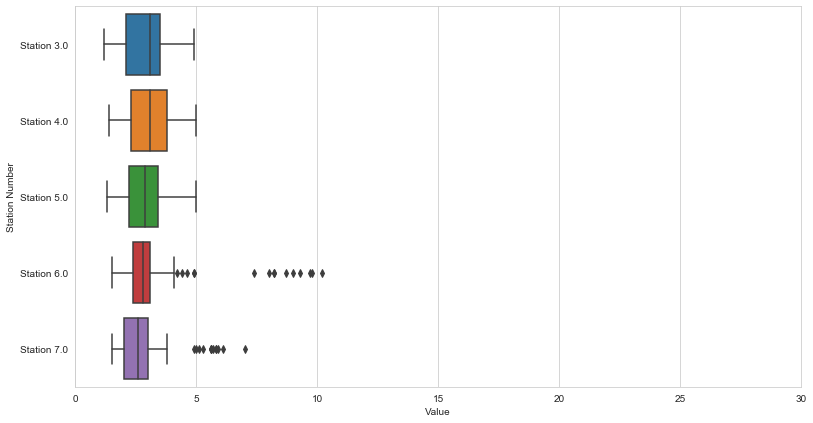

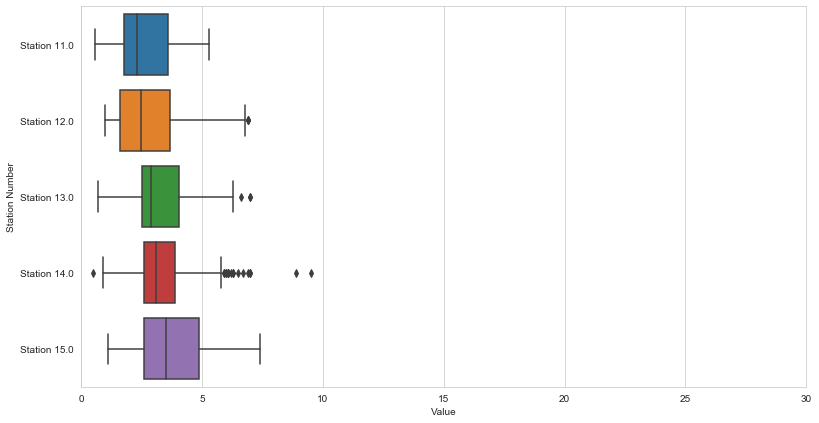

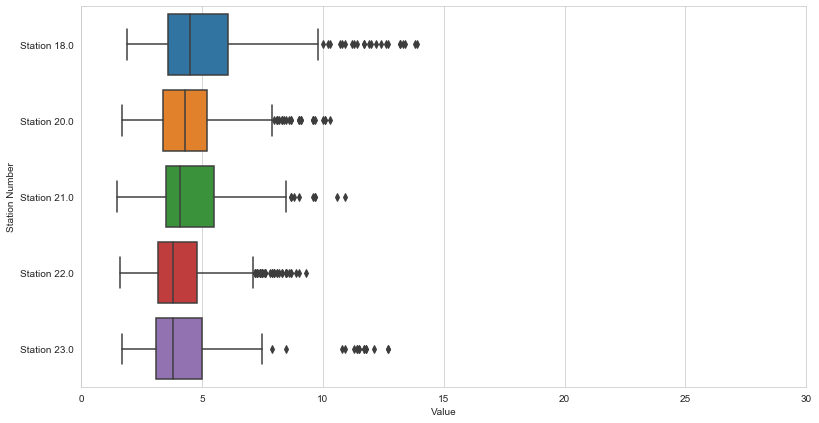

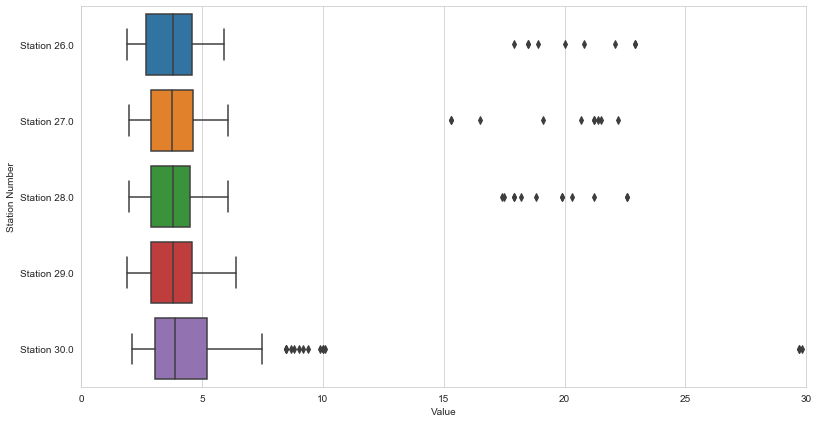

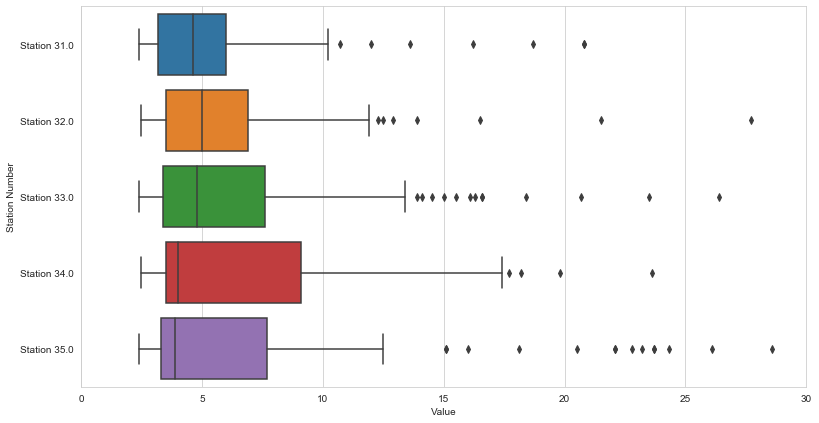

In [4]:
from analysisMethods import stationSwarmPlot
for region in [regionA, regionB, regionC, regionD, regionE]:
    stationSwarmPlot(year2018, region, chloro)

Since I wanted to have a quick glance over the differences in distribution of chlorophyll concentration values across diferent regions, I wanted to compare and contrast the regions in the most recent year using data from 2018. This snapshot shows how regionA and regionB appear to look similar, although regionB has a slightly larger range of values where it seems to have values that fall around its third quartile that is slightly higher than region A. RegionC has an even larger range of values than the former 2, including several outliers that exceed the values found in regionA and B. However, regionD slightly mirrors regionA and regionB, yet it possesses values that are exceed A, B, and C. Finally, one can notice that region E contains the highest max, highest 3rd quartile, and outliers that far exceed many values of the former four regions. 

In [7]:
for region in [regionA, regionB, regionC, regionD, regionE]:
    for station in region:
        print("Median: " + str(year2018.get_group((station, chloro))['Value'].median()) + ", " + "Max: " +str(year2018.get_group((station, chloro))['Value'].max()))
    print("\n")

Median: 3.1, Max: 4.9
Median: 3.1, Max: 5.0
Median: 2.9, Max: 5.0
Median: 2.8, Max: 10.2
Median: 2.6, Max: 7.0


Median: 2.3, Max: 5.3
Median: 2.5, Max: 6.9
Median: 2.9, Max: 7.0
Median: 3.1, Max: 9.5
Median: 3.5, Max: 7.4


Median: 4.5, Max: 13.9
Median: 4.3, Max: 10.3
Median: 4.1, Max: 10.9
Median: 3.8, Max: 9.3
Median: 3.8, Max: 12.7


Median: 3.8, Max: 22.9
Median: 3.75, Max: 22.2
Median: 3.8, Max: 22.6
Median: 3.8, Max: 45.5
Median: 3.9, Max: 32.0


Median: 4.65, Max: 50.0
Median: 5.0, Max: 59.8
Median: 4.8, Max: 70.3
Median: 4.0, Max: 100.5
Median: 3.9, Max: 32.1




In 2018, region A clearly has the lowest median values by station, followed by region B; the other three regions had slightly higher median values, where Region E seems to have among the highest out of all regions. From these quick snapshots, it seems that regions A and B contain the lowest cholorohyll concentrations among the regions, whereas regions D and E contain the highest

Let's also quickly analyze depth:

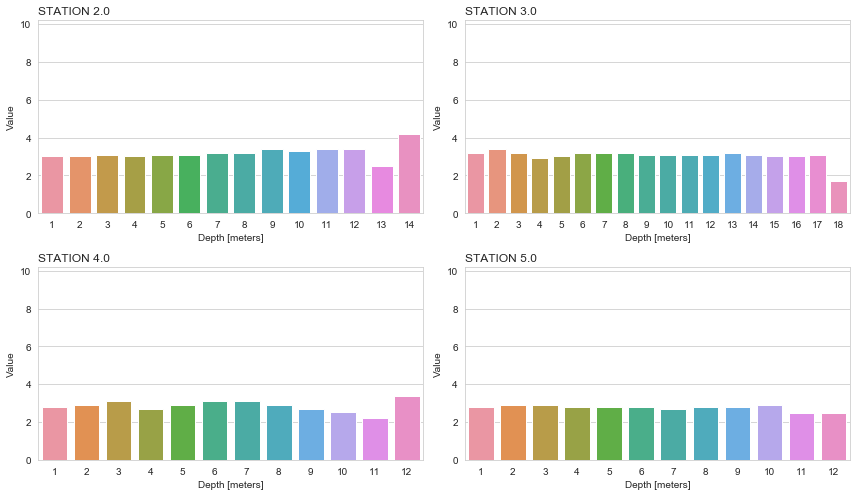

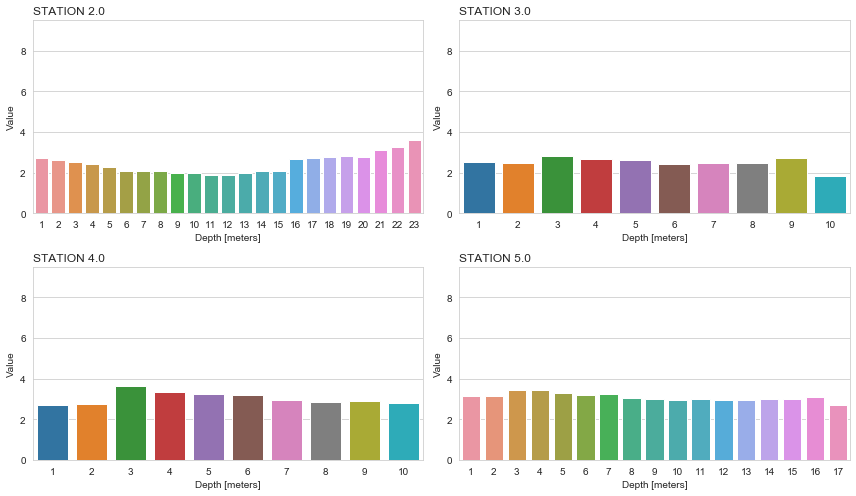

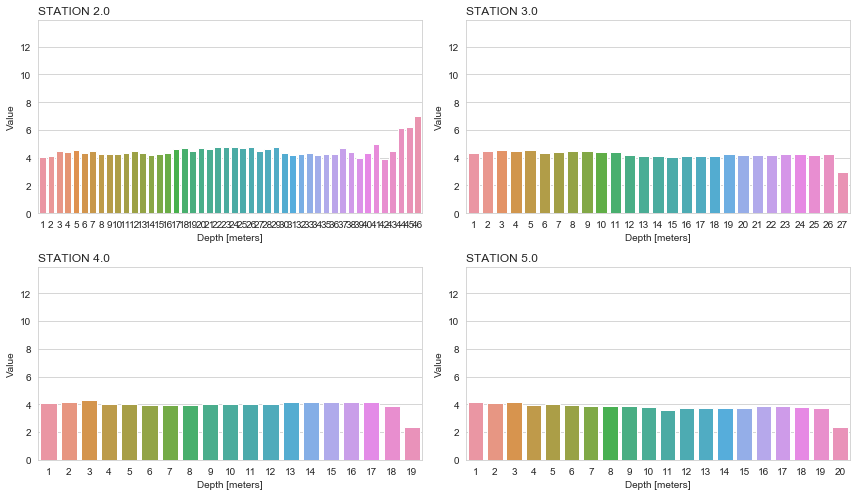

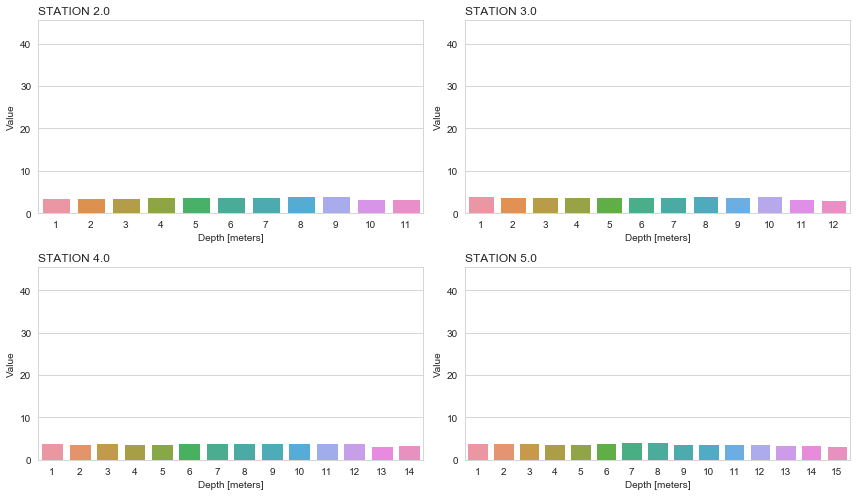

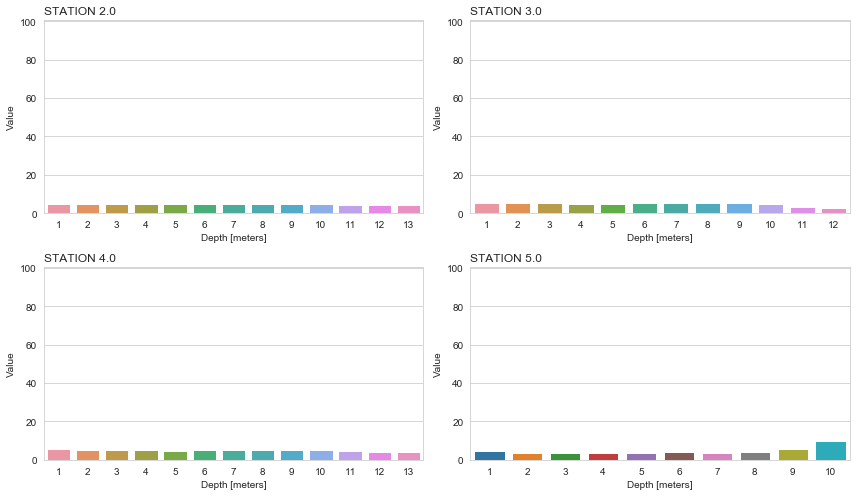

In [45]:
from analysisMethods import stationDepthPlots
for region in [regionA, regionB, regionC, regionD, regionE]:
    stationDepthPlots(year2018, region, chloro)

After graphing the concentration values by depth, it seems to be similar within each station. Note that each station has different concentrations at different levels of depth. Thus, there might not be any interesting associations between concentration and the meters of depth down the water the concentration was taken in. Furthermore, it seems that, for an individual station, the levlel of chlorophyll concentration doesn't seem to change that much when measured meters below the water surface. 

In [35]:
# created a quick function to calculate upperIQR value
def upperIQR(yearGroup, station, constituent):
    iqr = (1.5*(yearGroup.get_group((station, constituent))['Value'].quantile(0.75)) - (yearGroup.get_group((station,
    constituent))['Value'].quantile(0.25))) + (yearGroup.get_group((station, constituent))['Value'].quantile(0.75))
    return iqr

The highest median belonged to station 31 in region E. Let's quickly see a snapshot of its outliers. 

In [44]:
year2018.get_group((31.0, chloro)).loc[year2018.get_group((31.0, chloro))['Value'] > (upperIQR(year2018, 31.0, chloro))]

,Depth [meters],Coordinates,Value
Date MM/DD/YYYY,,,
2018-04-09,1,"(37 31.7', -122 9.5')",20.8
2018-04-09,2,"(37 31.7', -122 9.5')",20.8
2018-04-09,3,"(37 31.7', -122 9.5')",18.7
2018-04-09,4,"(37 31.7', -122 9.5')",16.2
2018-04-09,5,"(37 31.7', -122 9.5')",13.6
2018-04-09,6,"(37 31.7', -122 9.5')",12.0
2018-04-18,1,"(37 31.7', -122 9.5')",44.0
2018-04-18,2,"(37 31.7', -122 9.5')",44.0
2018-04-18,3,"(37 31.7', -122 9.5')",42.9


It's quite interesting to see that most of these occur during Apirl. In fact, the highest cholorophyll concentrations seem to occur this time (from March to May).

In [39]:
year2014Chloro = monthlyMean(year2014, chloro)
year2015Chloro = monthlyMean(year2015, chloro)
year2016Chloro = monthlyMean(year2016, chloro)
year2017Chloro = monthlyMean(year2017, chloro)
year2018Chloro = monthlyMean(year2018, chloro)

I thought what was most interesting is how big spikes of cholrophyll conentration in the waters occur begin in summer. From analyzing the average and medium concentration of cholrophyll in a monthly-basis after each year, it wasn't quite surprising to see that the summer time saw an increase of this constituent. 

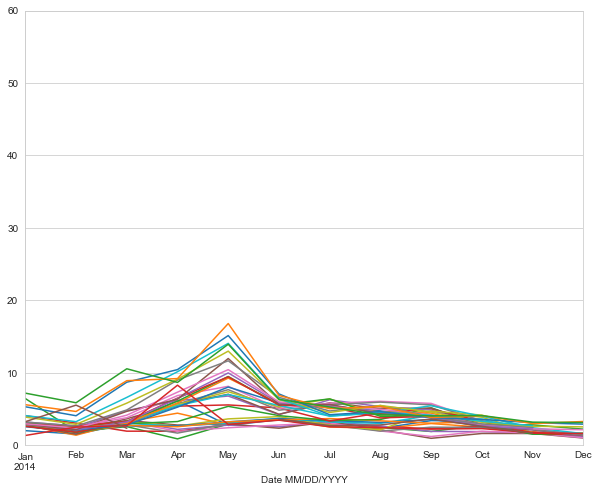

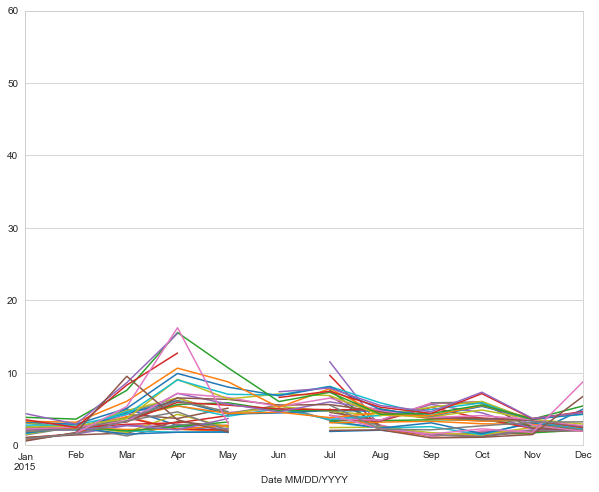

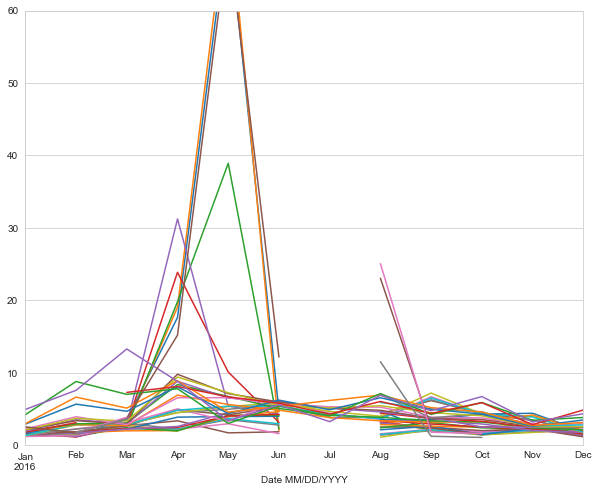

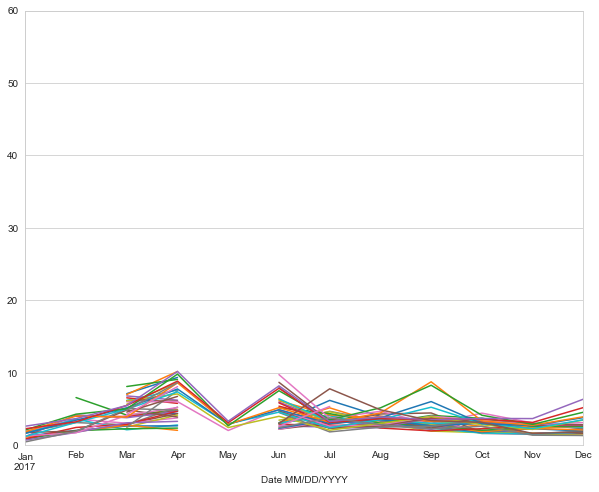

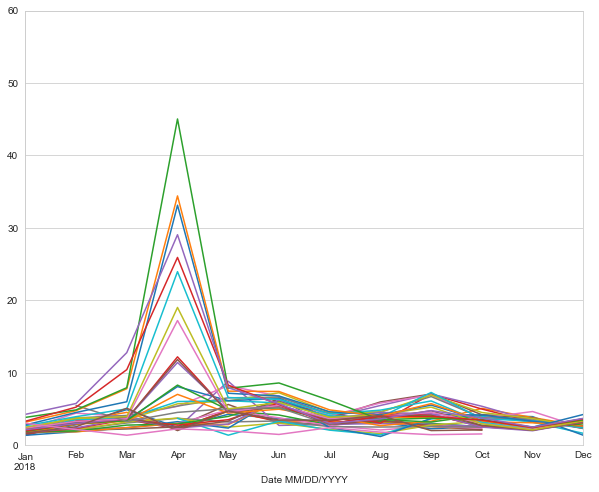

In [47]:
for year in [year2014Chloro, year2015Chloro, year2016Chloro, year2017Chloro, year2018Chloro]:
    monthlyMeanPlot(year)

Though we don't necessarily care about the individual lines themselves, we decided to plot all station lines so we may infer which times of the year usually undergo spikes in cholorophyll concentration. Besides 2017, each year saw an increase in concentration from March to May and demonstrated the greatest amount of deviance from the overall trend, coupled with a decreasing trend towards the monthly mean after May. Furthermore, we also see a slight increase, though not as drastic, from August to October. Thus, I hypothesized that Sprng and late summer were time periods were when cholorophyll concentration increased, possbily due to temperatures. Furthermore, I decided to then investigate and analyze water temperature during the peak periods for cholrophyll. 

In [10]:
temp = "Temperature [°C]"

year2014Temp = monthlyMean(year2014, temp)
year2015Temp = monthlyMean(year2015, temp)
year2016Temp = monthlyMean(year2016, temp)
year2017Temp = monthlyMean(year2017, temp)
year2018Temp = monthlyMean(year2018, temp)

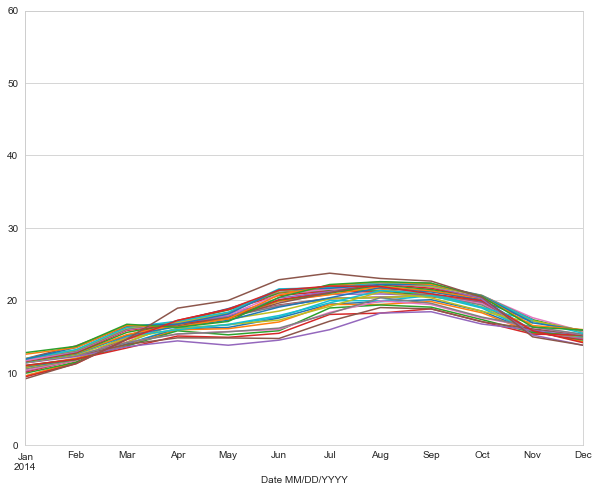

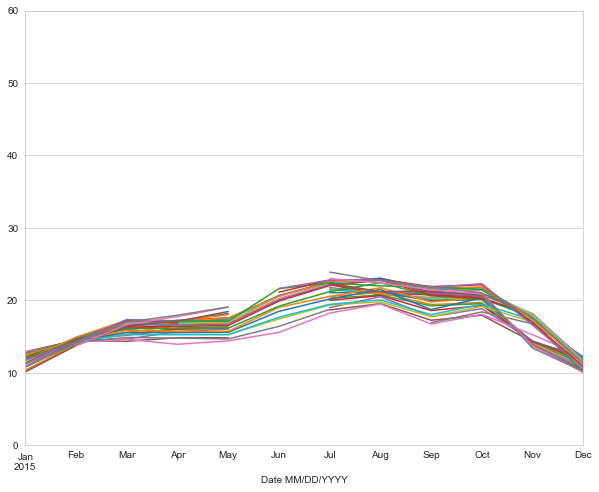

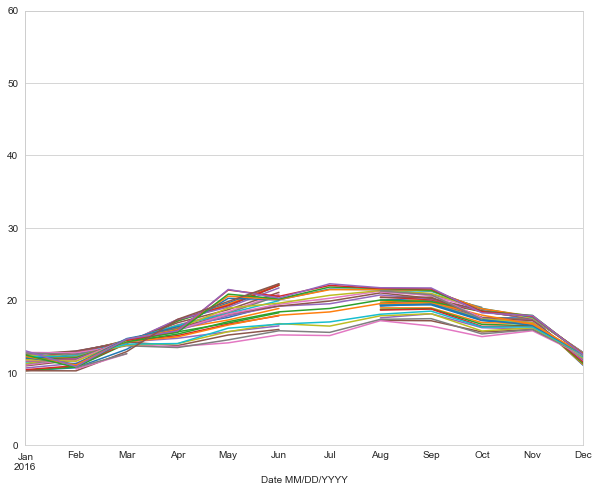

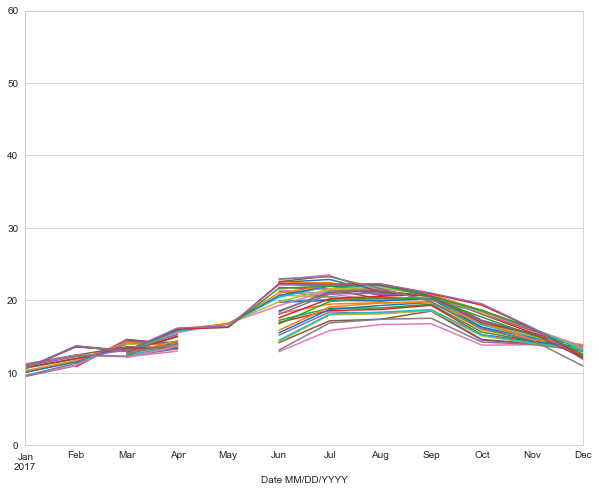

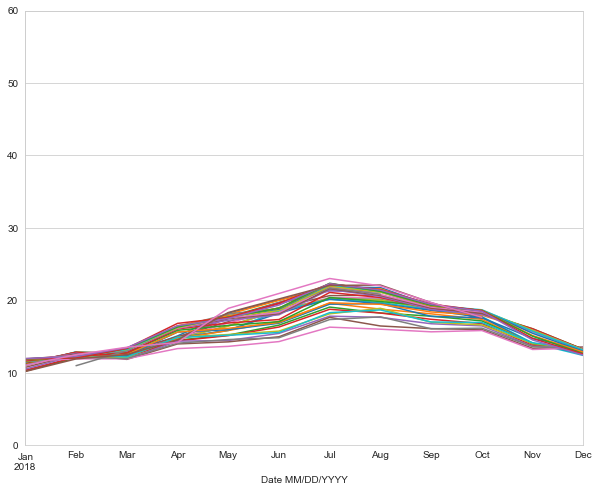

In [11]:
for year in [year2014Temp, year2015Temp, year2016Temp, year2017Temp, year2018Temp]:
    monthlyMeanPlot(year)

From examining the monthly mean plots of temperature, it's not surprising that June and July is the time when temperatures peak. What seems more interesting is to see that during the months of March, April, and May, there aren't any identifiable patterns based on the plots that can give more insight on what may cause the sharp rise in chlorophyll concentration around this time. 

A possible constituent that could provide insights is calculated oxygen. This was estimated from the concentration of dissolved oxygen calculaed from an electrode voltage output which was calibrated using linear regression with the discrete measure of dissolved oxygen. The electrode voltage output OXYG indicates the relative measure of concentration of dissolved oxygen in the water. Dissolved oxygen is necessary to many forms of aquatic fauna, yet high or low levels can disrupt aquatic life and worsen water quality. 

## Analyzing Dissolved Oxygen

First, plot the montly means of calculated oxygen. 

In [57]:
calcoxy = "Calculated Oxygen [mg/L]"

year2014Coxyg = monthlyMean(year2014, calcoxy)
year2015Coxyg = monthlyMean(year2015, calcoxy)
year2016Coxyg = monthlyMean(year2016, calcoxy)
year2017Coxyg = monthlyMean(year2017, calcoxy)
year2018Coxyg = monthlyMean(year2018, calcoxy)

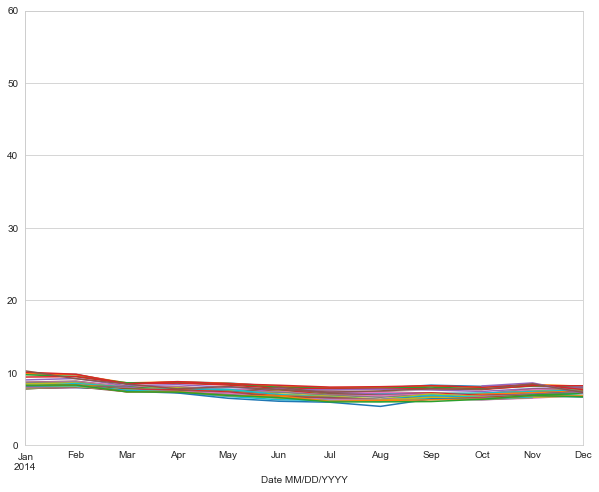

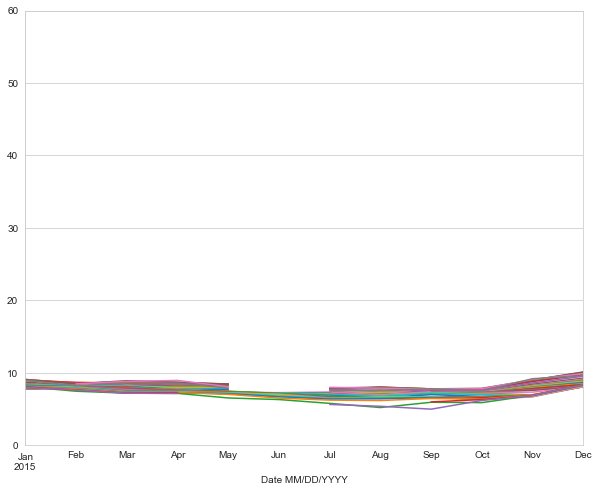

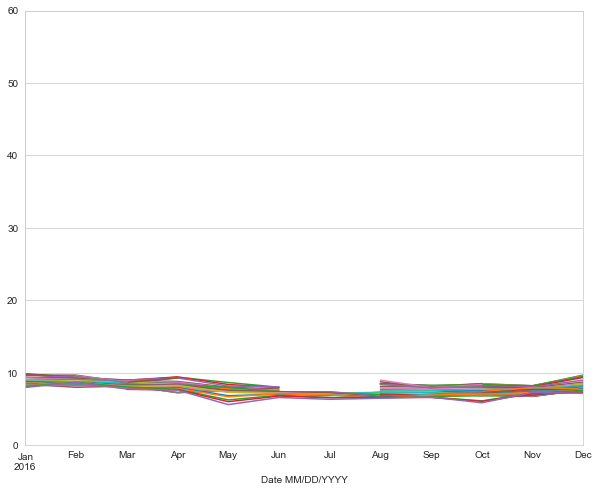

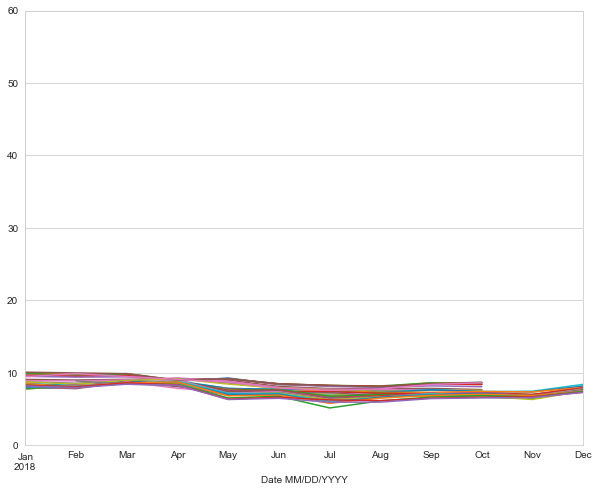

In [21]:
for year in [year2014Coxyg, year2015Coxyg, year2016Coxyg, year2018Coxyg]:
    monthlyMeanPlot(year)

From these monthly mean plots, it appears that concentrated oxygen in the water samples follow a subtle downward trend beginning around March up until June or July, or even September in the case of 2015. In regards of the peaks of chlorophyll conentration around April and May, we might suspect that this could have been a result of an increase growth in algae plants, or other aquatic plants, which would lead to discoloration, an indication of the presence of cholorophyll. If this was the case, it would be surprising to see that there wasn't an uptick in oxygen conentration, since more algae, and in general aquatic plants, woud lead to an increase in oxygen production due to photosynthesis. With regards to algae blooms, its not surprising then to see a downward  trend in dissolved oxygen coupled with increase in cholorophyll concentration, leading us to a prediction that other constituents may have caused the increase in chloropyll due to an increase in algae, but with a greater net effect on the decrease of oxygen; thus, what would cause this net effect, such that a greater amount of oxygen is decreasing than it is produced could be the result of other compounds inside the water. Since this dataset contains records of ammonium, phosphate, and silicate, we may suspect that these could cause a potential algae bloom that led to the seasonal increases in chlorophyll around spring, and had a significant effect on decreasing dissolved oxygen (where it should be the other way around due to photosynthesis and more algae). Thus, these compounds could help answer our question

## Analyzing other Compounds - South Bay Stations

In [3]:
ammonium = 'Ammonium [µM]'

year2014Amnm = monthlyMean(year2014, ammonium)
year2015Amnm = monthlyMean(year2015, ammonium)
year2016Amnm = monthlyMean(year2016, ammonium)
year2017Amnm = monthlyMean(year2017, ammonium)
year2018Amnm = monthlyMean(year2018, ammonium)

In [37]:
phosphate = 'Phosphate [µM]'

year2014Phos = monthlyMean(year2014, phosphate)
year2015Phos = monthlyMean(year2015, phosphate)
year2016Phos = monthlyMean(year2016, phosphate)
year2017Phos = monthlyMean(year2017, phosphate)
year2018Phos = monthlyMean(year2018, phosphate)

In [5]:
silicate = 'Silicate [µM]'

year2014Sil = monthlyMean(year2014, silicate)
year2015Sil = monthlyMean(year2015, silicate)
year2016Sil = monthlyMean(year2016, silicate)
year2017Sil = monthlyMean(year2017, silicate)
year2018Sil = monthlyMean(year2018, silicate)


In [35]:
nitrite = "Nitrite [µM]"

year2014Nit  = monthlyMean(year2014, nitrate)
year2015Nit  = monthlyMean(year2015, nitrate)
year2016Nit  = monthlyMean(year2016, nitrate)
year2017Nit  = monthlyMean(year2017, nitrate)
year2018Nit  = monthlyMean(year2018, nitrate)

In [30]:
for year in [year2014Amnm, year2015Amnm, year2016Amnm, year2017Amnm, year2018Amnm]:
    print(len(set(station_list).difference(set(year[pd.notnull(year['mean'])]['Station']))))

22
23
23
22
23


In [32]:
for year in [year2014Phos, year2015Phos, year2016Phos, year2017Phos, year2018Phos]:
    print(len(set(station_list).difference(set(year[pd.notnull(year['mean'])]['Station']))))

22
23
23
22
23


In [33]:
# Method to determine stations that have a monthly mean value and how many values are present for each station. 
def stationsWithMeans(yearGroupedMeans, yearGroup, constituent):
    stations_with_values = set(station_list).difference(set(yearGroupedMeans[pd.notnull(yearGroupedMeans['mean'])].Station))
    for station in sorted(list(set(station_list).difference(stations_with_values))):
        print(str(station), (yearGroup.get_group((station, constituent))[yearGroup.get_group((station, constituent))['Value'].notnull()]).shape)

Note that some stations actually contain values, but may not have values for all dates. Stations that usually have the most: 18, 22, 24, 27, 30, 32, 36

In [44]:
from datetime import datetime, timedelta
from matplotlib.dates import DateFormatter

def particlePlots(df_to_graph, figure, axis, title):
    # Control maximum y-value of the graphs by determining the max mean value of all dataframes
    largestMean= max(list(map(lambda x: x['mean'].max(), dfs)))
    for index, df_year in enumerate(df_to_graph):
        ax = axis[index]
        ax.set_ylim([0,round(largestMean)])
        ax.set_title(year_titles[index], fontsize = 14)
        labelIndex = 0 
        for stationNum in stationsToPlot:
            df = df_year[df_year['Station'] == stationNum]['mean']
            df.index = df.index.strftime('%m')
            ax.plot(df, label = stationsToPlot[labelIndex]) 
            labelIndex += 1 
        ax.legend(loc = "upper left", title = "Stations")
        ax.set_xlabel("Months")
    figure.text(0.1, 0.5, 'Concentration [µM]', va='center', rotation='vertical', fontsize=12)
    figure.suptitle(title, fontsize = 20)

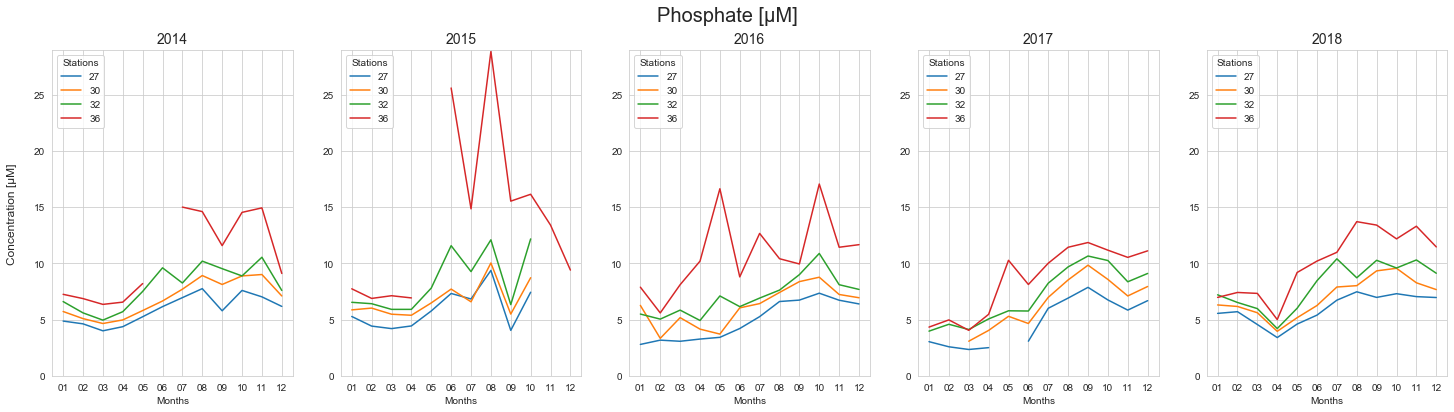

In [38]:
stationsToPlot = [27, 30, 32, 36]
dfs = [year2014Phos,year2015Phos, year2016Phos, year2017Phos, year2018Phos]
phosphateGraph, years = plt.subplots(nrows = 1, ncols = 5, figsize = (25,6))
particlePlots(dfs, phosphateGraph, years, "Phosphate [µM]")

It is well known that phosphate is a common constituent of agricultural fertilizers, manure, and organic wastes in sewage and industrial processes. Too much phosphate can lead to eutrophication. It appears that that phosphate concentration tends to increase as we go south (from station 27 to station 36), which can indicate how concentrated the lower San Francisco Bay is. Noticeably in 2014, 2015, and 2018, there was a dip in phosphate concentration occurring in March and April and a sudden uptick beginning in May. If we refer back the monthly mean plots for dissolved oxygen, this was also the time when dissolved oxygen concentration began to slightly decrease as well as when the peak of chlorophyll conentration began to occur. However, there is not much of a relationship from the months of June to August where phosphate conentration increases. Dissolved Oxygen concentration continues to decrease while there's no recognizeable pattern for chlorophyll. 

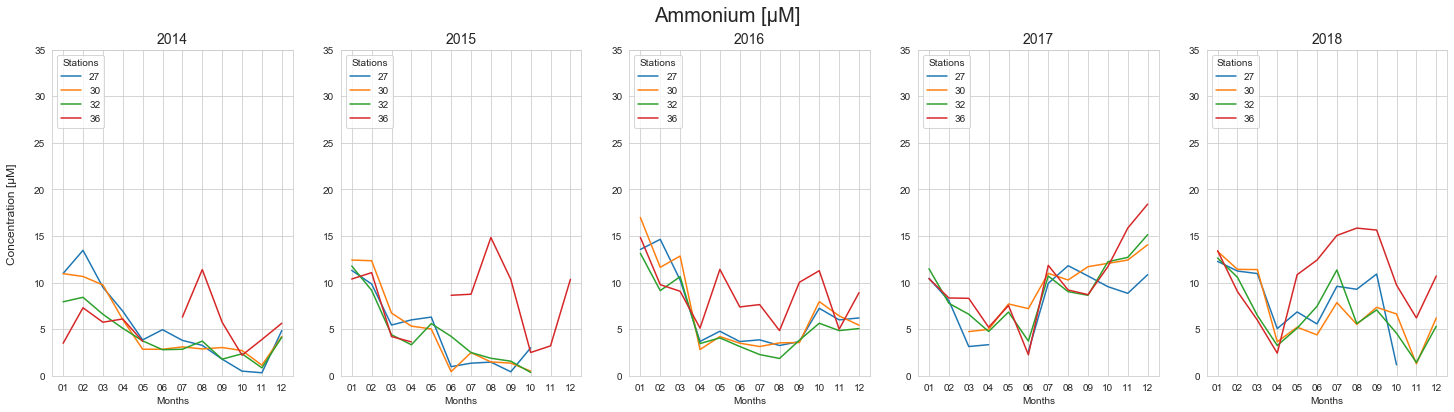

In [39]:
dfs = [year2014Amnm, year2015Amnm, year2016Amnm, year2017Amnm, year2018Amnm]
ammoniumGraph, years = plt.subplots(nrows = 1, ncols = 5, figsize = (25,6))
particlePlots(dfs, ammoniumGraph, years, "Ammonium [µM]")

Similar to phosphate, ammounium can enter the aquatic environment through municipal effluent discharge, along with the excretion of nitrogeneous wastes from animals including indirect means through air deposition. A noticeable trend with Ammonium is the decrease in concentration that occurs from late winter to summer. 

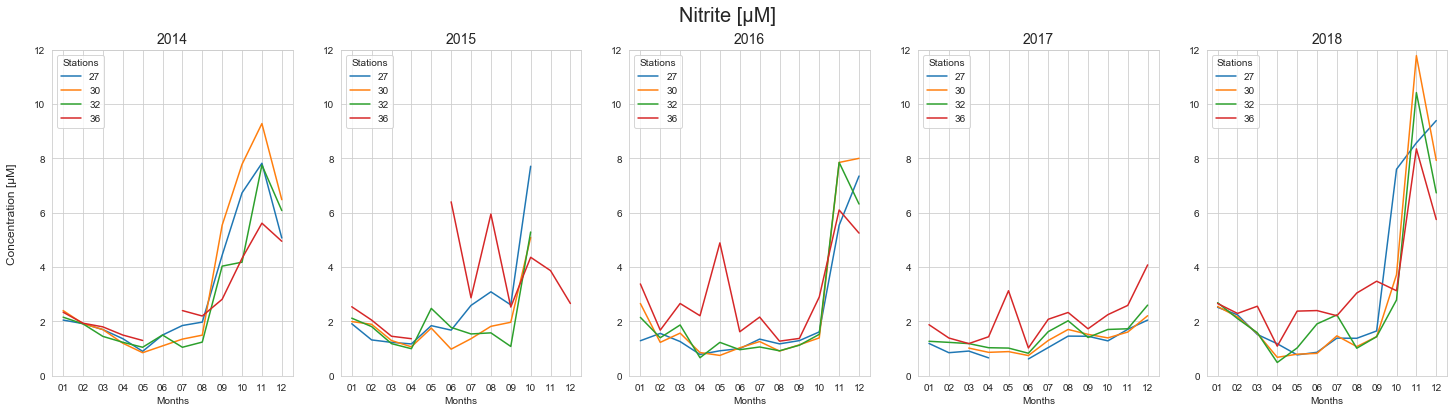

In [43]:
dfs = [year2014Nit, year2015Nit, year2016Nit, year2017Nit, year2018Nit]
nitrateGraph, years = plt.subplots(nrows = 1, ncols = 5, figsize = (25,6))
particlePlots(dfs, nitrateGraph, years, nitrate)

Nitrite is known as another cause for eutrophication and can enter water through fertilizers through run-off water, sewage, and mineral deposits. One can see that there is a general uptick in nitrite concentration occurring around late summer that continues until November. In relation to cholorophyll, there doesn't seem to have a great assoication, although cholorophyll concentration from summer to autumn remains relatively uniform, although a tiny uptick of chlorophyll concentration from September and October occurs. 

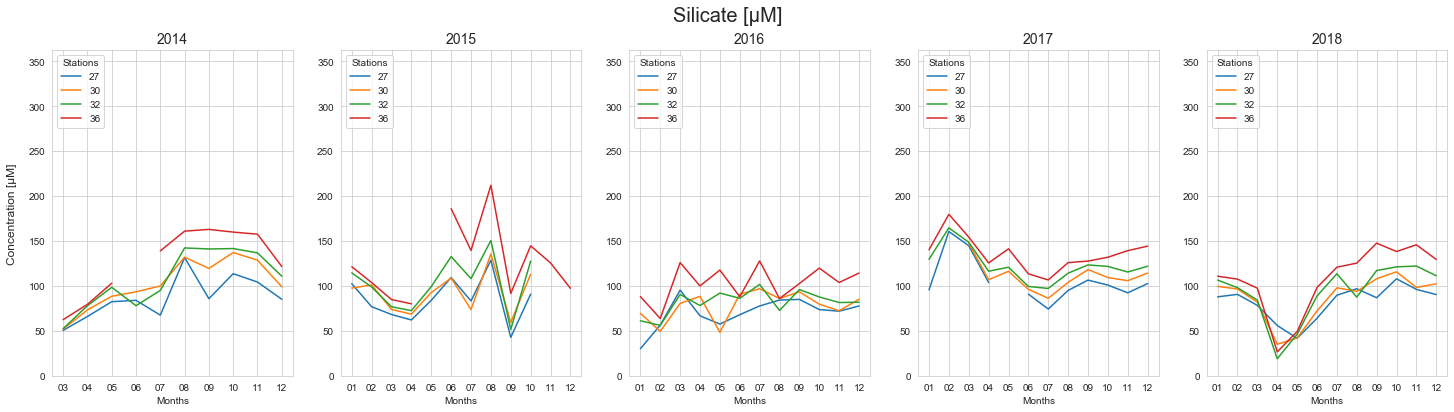

In [41]:
dfs = [year2014Sil, year2015Sil, year2016Sil, year2017Sil, year2018Sil]
silicateGraph, years = plt.subplots(nrows = 1, ncols = 5, figsize = (25,6))
particlePlots(dfs, silicateGraph, years, "Silicate [µM]")

The concentration of sillicate seems to be noisier than the other constituents when viewing the amount present in the South Bay. This wouldn't come as a complete surprise since silicate usually only affects the salinity of the water, and isn't much of a focus when determining harmful effects of a constituent in water. We should expect that salinity would be slightly more unpredicatable. 

Overall, different constituents begin to show trends at different times of the year across 5 years from the water quality samples. When examining these four constituents, it seems that there could be a slight association between the trends for phosphate and dissolved oxygen as well as nitrite and chloropyll. We can quickly create a correlation matrix to get a quick sense of whether this statement may seem valid. 

In [34]:
stationsWithMeans(year2018Nit, year2018, nitrite)

3.0 (11, 5)
6.0 (11, 5)
9.0 (11, 5)
13.0 (12, 5)
15.0 (12, 5)
18.0 (22, 5)
22.0 (22, 5)
24.0 (22, 5)
27.0 (22, 5)
30.0 (22, 5)
32.0 (22, 5)
34.0 (3, 5)
36.0 (19, 5)
649.0 (11, 5)
657.0 (11, 5)


In [41]:
stationsWithMeans(year2018Phos, year2018, phosphate)

3.0 (11, 5)
6.0 (11, 5)
9.0 (11, 5)
13.0 (12, 5)
15.0 (12, 5)
18.0 (22, 5)
22.0 (22, 5)
24.0 (22, 5)
27.0 (22, 5)
30.0 (22, 5)
32.0 (22, 5)
34.0 (3, 5)
36.0 (19, 5)
649.0 (11, 5)
657.0 (11, 5)


We'll use station 32 to compare the correlations. 

Text(0.5, 0.98, 'Comparison between constituents \n (Chlorophyll & Phosphate) and (Dissolved Oxygen & Nitrite) for station 32.0 in 2018')

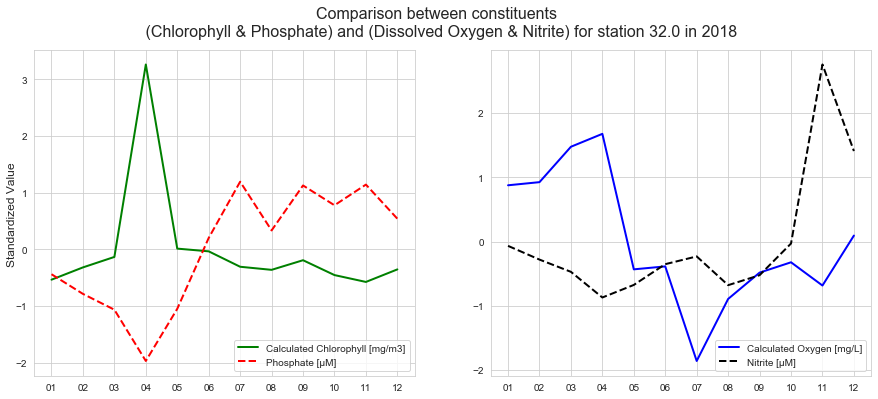

In [112]:
from sklearn.preprocessing import StandardScaler
# Quick method
def standard_transform(df):
    scaler = StandardScaler()
    copied_df = df[df['Station'] == 32.0].copy()
    values_to_scale = np.array(df[df['Station'] == 32.0]['mean']).reshape(-1,1)
    values_to_scale = scaler.fit_transform(values_to_scale)
    values_to_scale = values_to_scale.ravel()
    copied_df['scaled'] = values_to_scale
    copied_df.index = copied_df.index.strftime('%m')
    return copied_df


scaled_chloro2018 = standard_transform(year2018Chloro)
scaled_phos2018 = standard_transform(year2018Phos)
scaled_nit2018 = standard_transform(year2018Nit)
scaled_oxy2018 = standard_transform(year2018Coxyg)

compareGraphs, year = plt.subplots(nrows= 1, ncols = 2, figsize = (15, 6))
year[0].plot(scaled_chloro2018['scaled'], c = 'green', lw = 2, label = chloro)
year[0].plot(scaled_phos2018['scaled'], c = 'red', ls = '--', lw = 2, label = phosphate)
year[1].plot(scaled_oxy2018['scaled'], c = 'blue', lw = 2, label = calcoxy)
year[1].plot(scaled_nit2018['scaled'], c = 'black', lw = 2, ls = '--', label = nitrite)
year[0].legend(loc = "lower right")
year[1].legend(loc = "lower right")

compareGraphs.text(0.1, 0.5, 'Standardized Value', va='center', rotation='vertical', fontsize=12)
compareGraphs.suptitle("Comparison between constituents \n (Chlorophyll & Phosphate) and (Dissolved Oxygen & Nitrite) for station 32.0 in 2018", fontsize = 16)
